In [2]:
!pip install openeo-gfmap==0.4.4 --quiet
!pip install git+https://github.com/WorldCereal/prometheo.git --quiet
!pip install git+https://github.com/ScaleAGData/scaleag-vito.git --quiet
!pip install seaborn --quiet
!pip install tabulate --quiet

In [1]:
from pathlib import Path
from scaleagdata_vito.openeo.extraction_utils import (
    check_job_status,
    get_succeeded_job_details,
    load_point_extractions,
    get_band_statistics,
    visualize_timeseries,
)

### Inspect OpenEO extractions

Once the extractions have been completed, we can inspect the job tracking dataframe to find out how many jobs were successfully completed.


In [2]:
extraction_folder = Path("/home/giorgia/Private/data/geomaize/new_extractions/")  # Replace with your output folder path
status_histogram = check_job_status(extraction_folder)
succeeded_jobs = get_succeeded_job_details(extraction_folder)

+----------+---------+
| status   |   count |
|----------+---------|
| finished |       3 |
+----------+---------+
+------------------------------------+-----------+-------------+-----------------+
| id                                 | s2_tile   |   n_samples |   duration_mins |
|------------------------------------+-----------+-------------+-----------------|
| j-25080808194749b6a107246360664629 | 30PYR     |          45 |         8.21667 |
| j-2508080836114d1784aefece0aa2d864 | 30PYR     |          43 |         5.13333 |
| j-2508080844014d98b06c4a34d2b70eac | 30PYR     |          40 |         6.28333 |
+------------------------------------+-----------+-------------+-----------------+


We can do a more in-depth check of the extracted data by:

- manually inspecting a subset of the extracted data (`load_point_extractions` function)

- printing statistics for each individual band that was extracted (`get_band_statistics` function)

- visualizing time series for a specified sample id (`visualize_timeseries` function)

NOTE: keep in mind when inspecting the results that nodata value = 0

In [3]:
gdf = load_point_extractions(
    extractions_dir=Path(extraction_folder),
    subset=False,
)
stats_df = get_band_statistics(gdf)

2025-08-08 17:05:12.946 | INFO     | scaleagdata_vito.openeo.extraction_utils:load_point_extractions:166 - Found 3 geoparquet files in /home/giorgia/Private/data/geomaize/new_extractions


+---------------+------------+--------+--------+--------+-------+---------------+------------+
| band          |   %_nodata |    min |    max |   mean |   std | start_datae   | end_date   |
|---------------+------------+--------+--------+--------+-------+---------------+------------|
| S2-L2A-B02    |      38.48 |   0    |   0.26 |   0.08 |  0.02 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B03    |      38.48 |   0.03 |   0.28 |   0.11 |  0.03 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B04    |      38.48 |   0.02 |   0.32 |   0.15 |  0.05 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B05    |      38.48 |   0.07 |   0.36 |   0.2  |  0.04 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B06    |      38.48 |   0.08 |   0.41 |   0.25 |  0.04 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B07    |      38.48 |   0.09 |   0.47 |   0.27 |  0.05 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B08    |      38.48 |   0.09 |   0.46 |   0.27 |  0.05 | 2021-01-01    | 2023-12-31 |
| S2-L2A-B8A    |      38.48 |   0.1  |   0.5  |  

In [4]:
gdf.sample_id.unique()

array(['5012LAB', '5057PAG', '7016SAM', '7068ZIN', '7074ZIN', '1056ZIN',
       '3074TAM', '5033TUG', '7015SAM', '7016ALH', '7036FUU', '7036SAN',
       '7061CHE', '7062CHE', '7070ZIN', '7071ZIN', '7072ZIN', '1055ZIN',
       '1029ZIN', '1061ZIN', '1067ZIN', '2002ALH', '2050KPA', '2053KPA',
       '3075TAM', '4020FUU', '5002LAB', '5011LAB', '5014LAB', '5016ZOR',
       '5017ZOR', '5034TUG', '5036TUG', '5037TUG', '7014SAM', '7015ALH',
       '7017SAM', '7018ALH', '7019ZOR', '7022FUU', '7033FUU', '7035FUU',
       '7058CHE', '7059CHE', '7069ZIN', '3089TIN', '3084TIN', '3062FUU',
       '1061zin', '3030Tin', '3073lab', '5036tug', '5060tug', '5002lab',
       '5014lab', '3074lab', '5012lab', '3075lab', '3076lab', '3077tug',
       '3078kpa', '3077kpa', '2050kpa', '3088TIN', '3087TIN', '3086TIN',
       '3085TIN', '3083TIN', '3082TIN', '3081TIN', '3080TIN', '3072ZIN',
       '3071ZIN', '3070ZIN', '3069TIN', '3068TIN', '3067FUU', '3066FUU',
       '3065FUU', '3064FUU', '3063FUU', '5038PAG', 

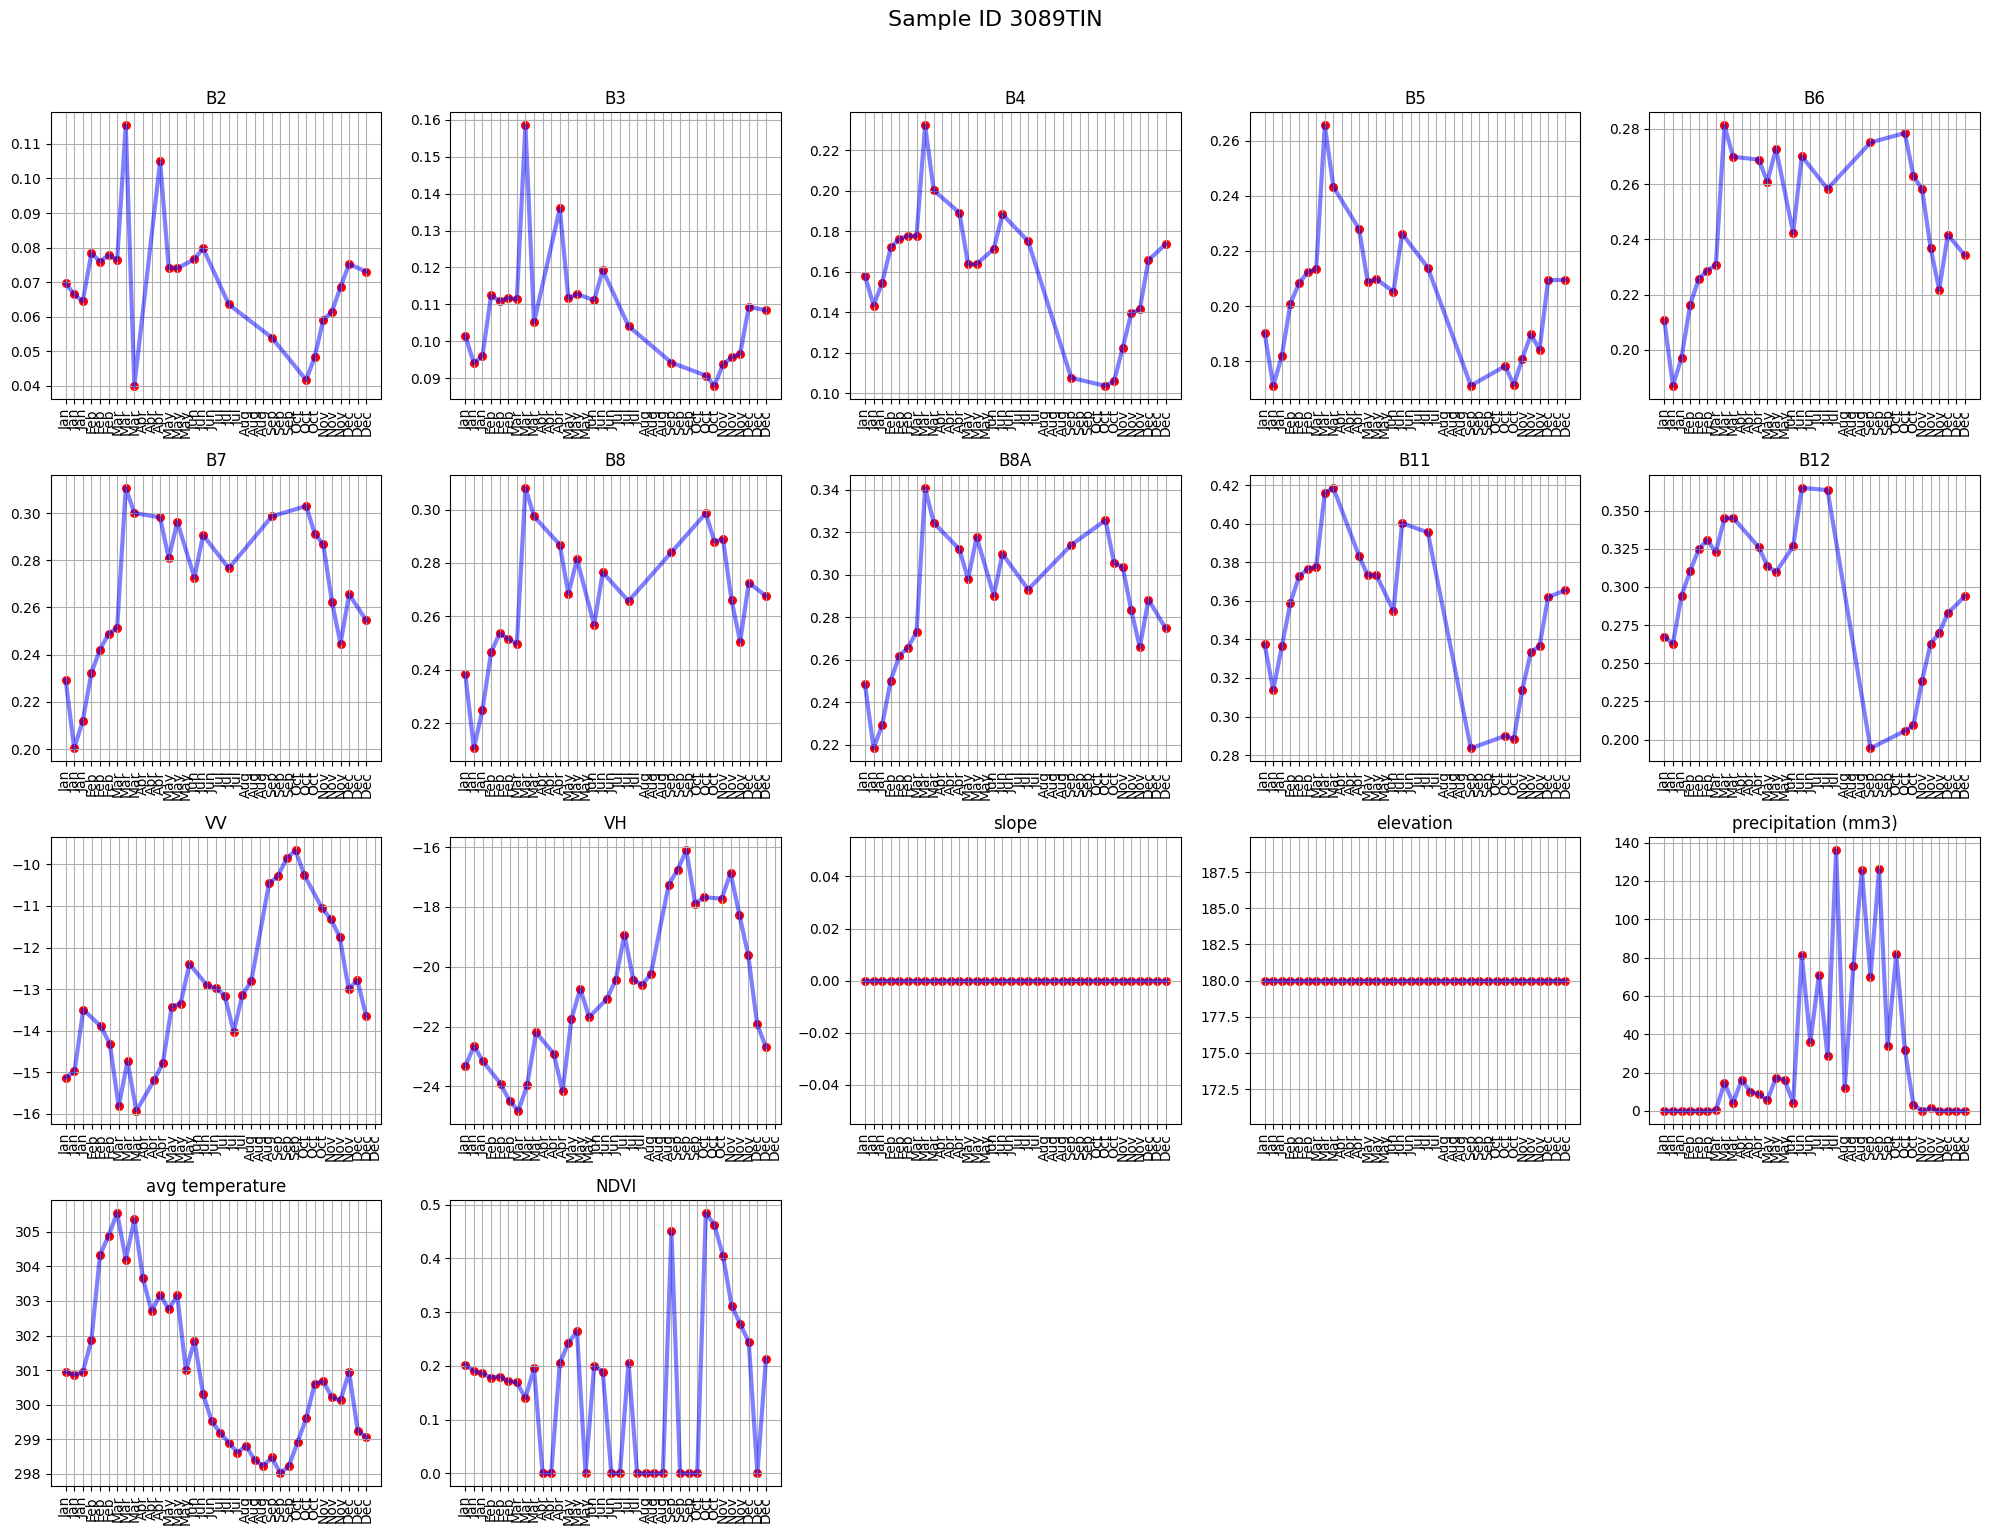

In [5]:
visualize_timeseries(gdf, sample_id="3089TIN")